In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
batch_size = 32
channel = 3
epochs=10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato dataset",
    shuffle = True ,
    image_size = (IMAGE_SIZE , IMAGE_SIZE),
    batch_size = batch_size,
)

Found 2152 files belonging to 3 classes.


In [5]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.numpy().shape)

(32, 256, 256, 3)


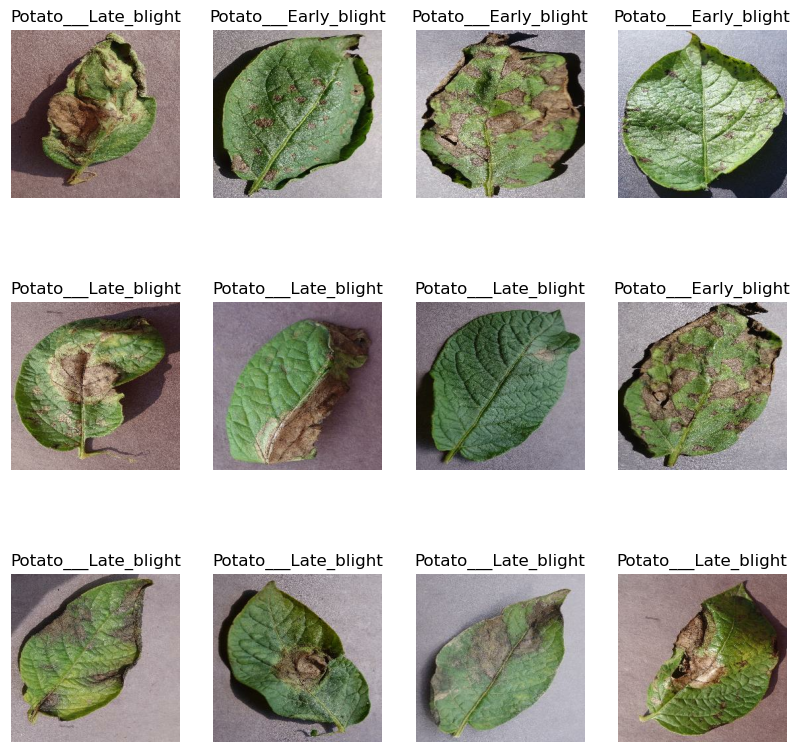

In [8]:
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3 , 4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [9]:
#80% == traning
#20% == 10% validation , 10% test

In [10]:
train_ds = 0.8
len(dataset)*train_ds

54.400000000000006

In [11]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [12]:
#val_size=0.1
#len(dataset)*val_test

In [13]:
val_size = test_ds.take(6)
len(val_size)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(test_ds)

8

In [19]:
len(val_ds)

6

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
resizing_rescaling = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])    

In [22]:
data_augmentaion = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)

])    

In [23]:
input_shape=(batch_size ,IMAGE_SIZE , IMAGE_SIZE , channel)
n_classes = 3

model= models.Sequential([
    resizing_rescaling,
    data_augmentaion,
    layers.Conv2D(32 , (3,3) , activation = "relu" , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 , (3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 , activation="relu"),
    layers.Dense(n_classes , activation = "softmax"),
])

model.build(input_shape = input_shape)
    

C:\Users\xxxxxx\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"])

In [26]:
history = model.fit(
    train_ds,
    epochs=20,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds)
    

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 968ms/step - accuracy: 0.4389 - loss: 0.9211 - val_accuracy: 0.7760 - val_loss: 0.5878
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 998ms/step - accuracy: 0.6830 - loss: 0.6745 - val_accuracy: 0.8646 - val_loss: 0.3401
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8376 - loss: 0.3946 - val_accuracy: 0.9115 - val_loss: 0.2780
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8600 - loss: 0.3208 - val_accuracy: 0.9323 - val_loss: 0.1864
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9024 - loss: 0.2489 - val_accuracy: 0.8854 - val_loss: 0.2774
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9127 - loss: 0.2259 - val_accuracy: 0.9219 - val_loss: 0.2477
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9136 - loss: 0.2139 - val_accuracy: 0.7760 - val_loss: 0.4301
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9006 - loss: 0.2237 - val_accuracy: 0.9219 - val

In [40]:
score=model.predict(test_ds)
score

TypeError: '_PrefetchDataset' object is not subscriptable

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
history.history["val_accuracy"]

[0.7760416865348816,
 0.8645833134651184,
 0.9114583134651184,
 0.9322916865348816,
 0.8854166865348816,
 0.921875,
 0.7760416865348816,
 0.921875,
 0.9583333134651184,
 0.9739583134651184,
 0.9375,
 0.9635416865348816,
 0.875,
 0.9583333134651184,
 0.9583333134651184,
 0.9479166865348816,
 0.9010416865348816,
 0.921875,
 0.9791666865348816,
 0.890625]

In [32]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

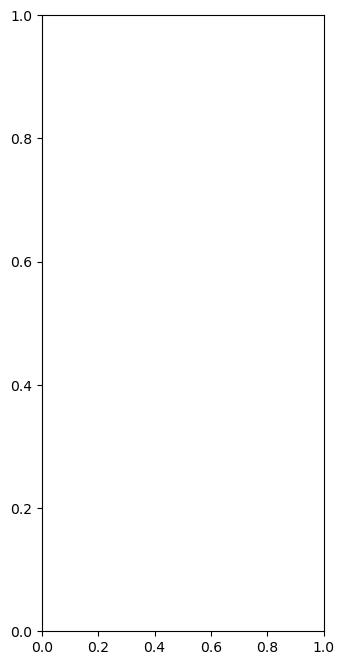

In [33]:
plt.figure(figsize = (8 , 8))
plt.subplot(1,2,1)
plt.plot(range(epochs) , acc , label="traning_accuracy")
plt.plot(range(epochs) , val_acc , label="validation_accuracy")
plt.title("traning and validation accuracy")

plt.figure(figsize = (8 , 8))
plt.subplot(1,2,1)
plt.plot(range(epochs) , loss , label="traning_accuracy")
plt.plot(range(epochs) , val_loss , label="validation_accuracy")
plt.title("traning and validation accuracy")

first image to predict
actual_label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
predicted_label: Potato___Early_blight


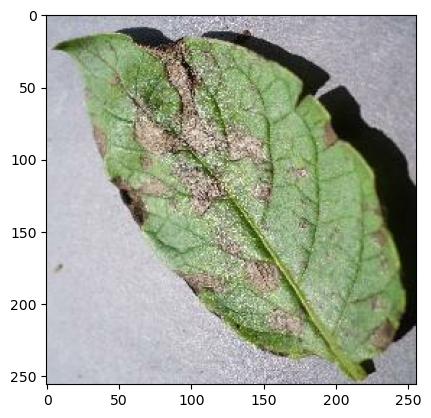

In [41]:
import numpy as np
for image_batch , label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype ("uint8")
    first_label=label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:" , class_name[first_label])

    batch_prediction=model.predict(image_batch)
    print("predicted_label:" , class_name[np.argmax(batch_prediction[0])])

In [42]:
def predict(model , img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array , 0)

    prediction=model.predict(img_array)

    prediction_class=class_name[np.argmax(batch_prediction[0])]
    confidence=round(100*(np.max(prediction[0])) , 2)
    return prediction_class , confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


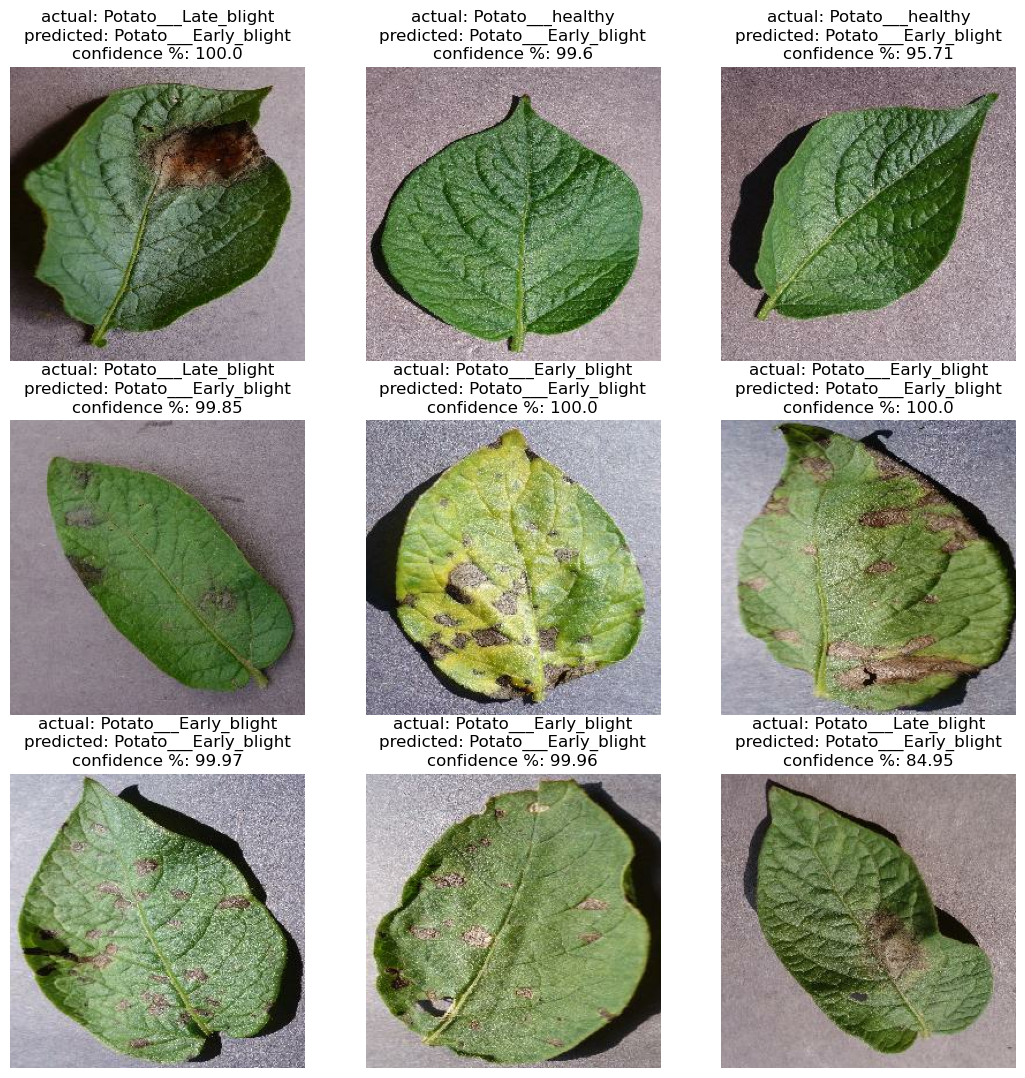

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"actual: {actual_class}\npredicted: {predicted_class}\nconfidence %: {confidence}")
        plt.axis("off")


In [51]:
model_version = 3
model.save(f"../models/{model_version}")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=../models/3.